# Lógica Difusa - Examen
## Esteban Padilla Cerdio
## A01703068

In [67]:
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy as np
import matplotlib.pyplot as plt


## Objetivo

En este examen, se presentará un modelo de lógica difusa, diseñado a través del método de sistemas neuro-difusos. El propósito del modelo será predecir el precio de una vivienda a través de ciertas características.

## Datos

Los datos seleccionados para el modelo serán:

- Entradas
	- Área de terreno
	- Área de primer piso

- Salidas
	- Precio de mercado

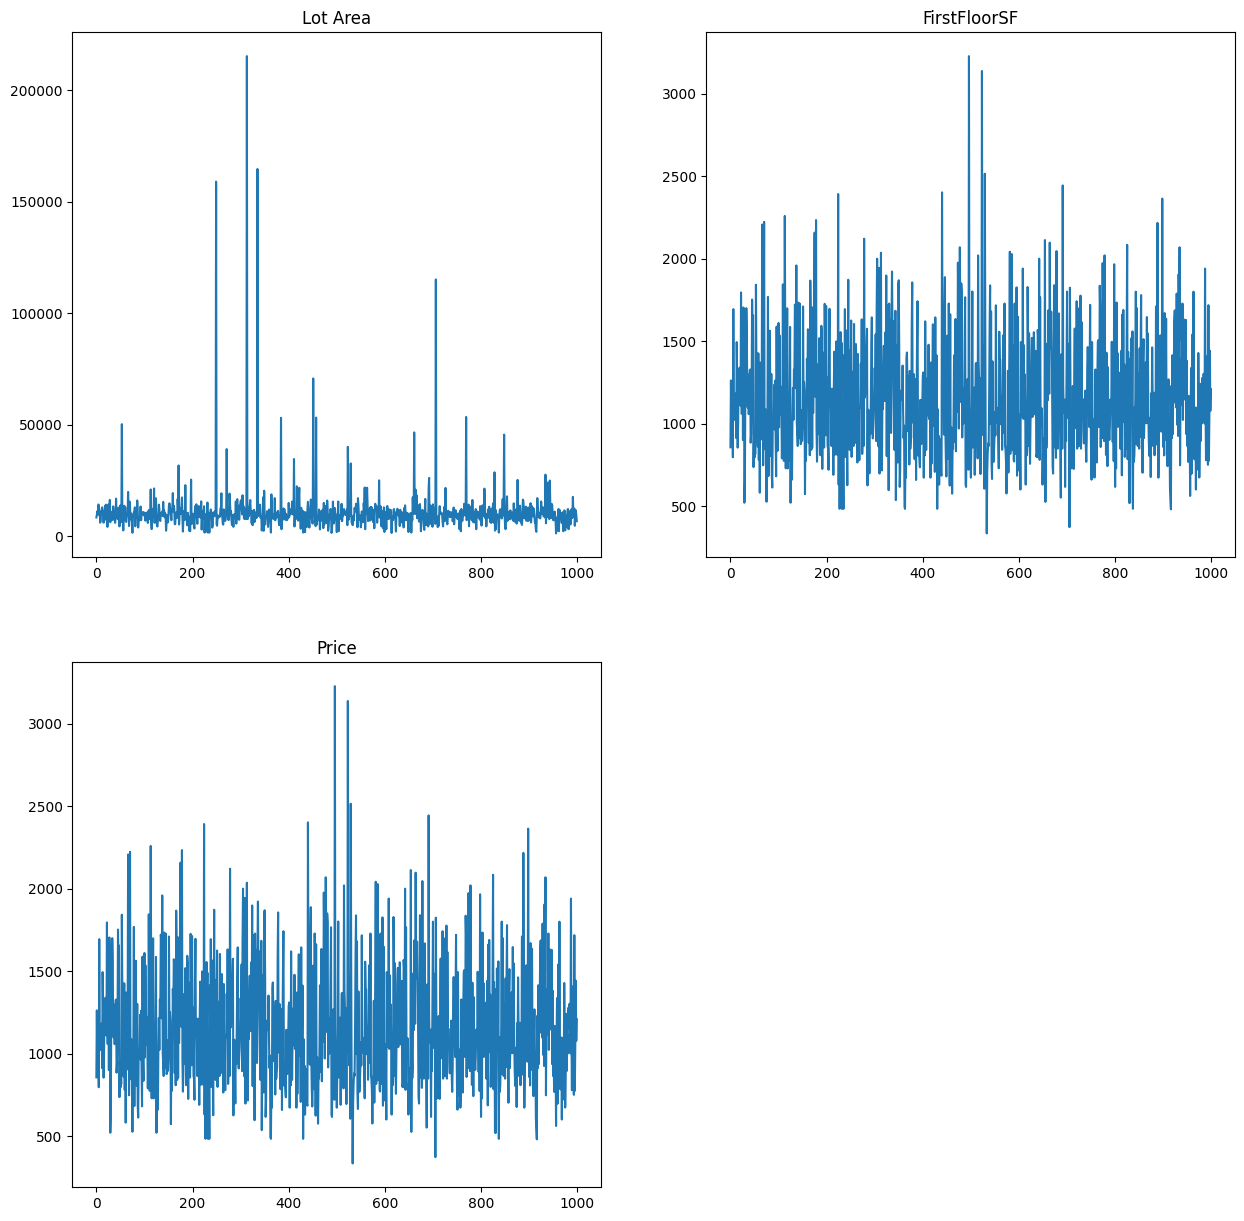

In [68]:
ts = np.loadtxt(
    "C:/Users/esteb/OneDrive/Documents/Escuela/Robótica/Fuzzy/anfis/anfis/hp_train.csv", delimiter=",")[:1000]

LotArea = ts[:, 0]
FirstFlrSF = ts[:, 1]
Price = ts[:, -2]

plt.subplots_adjust()
plt.subplot(2, 2, 1)
plt.plot(LotArea)
plt.title("Lot Area")

plt.subplot(2, 2, 2)
plt.plot(FirstFlrSF)
plt.title("FirstFloorSF")

plt.subplot(2, 2, 3)
plt.plot(Price)
plt.title("Price")



plt.gcf().set_size_inches(15, 15)
plt.show()

## Desarrollo

Se crearán cinco funciones de pertenencia gausianas, distribuídas equitativamente a lo largo del dominio de los datos. Posteriormente, se utilizarán los datos de entrada para entrenar el modelo a través de diez épocas, con un ritmo de aprendizaje de 0.005.

El ritmo de aprendizaje se obtuvo experimentalmente, repitiendo las pruebas hasta asegurarse de que no existía un overshooting, ni que el valor fuera demasiado bajo como para observar un aprendizaje significativo.

In [69]:
X = ts[:, 0:2]
Y = Price
mfs = 5

nx = np.linspace(np.min(X), np.max(X), mfs)
ny = np.linspace(min(Y), max(Y), mfs)


mfx = []
mfy = []

for i in range(mfs):

    
    mfx.append(['gaussmf', {'mean': np.round(nx[i], 1),
                            'sigma': np.round((np.max(X)-np.min(X))/2, 1)}])

    mfy.append(['gaussmf', {'mean': np.round(ny[i], 1),
							'sigma': np.round((max(Y)-min(Y))/2, 1)}])

    """
		mfx.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(nx[i], 1)}])
		mfy.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(ny[i], 1)}])
	
		mfx.append(['sigmf', {'b': np.round(nx[i], 1), 'c': 1}])
		mfy.append(['sigmf', {'b': np.round(ny[i], 1), 'c': 1}])"""
		
mf = [mfx, mfy]

mfc = membership.membershipfunction.MemFuncs(mf)

anf = anfis.ANFIS(X, Y, mfc)


1) MSEe: 9.616591401716145e-05
2) MSEe: 4.564447477229023e-05
3) MSEe: 8.57557597274906e-05
4) MSEe: 2.41818138900758e-05
5) MSEe: 2.3921274180421727e-05
6) MSEe: 2.057937312973917e-05
7) MSEe: 2.457679121185261e-05
8) MSEe: 6.688822678131079e-05
9) MSEe: 3.349488301935084e-05
Min error: 2.057937312973917e-05 at epoch 6
Plotting errors


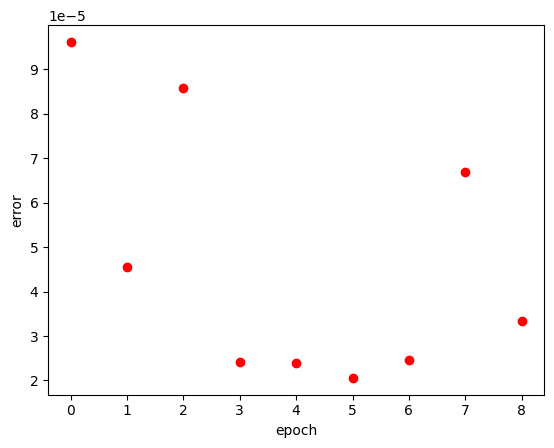

Plotting results


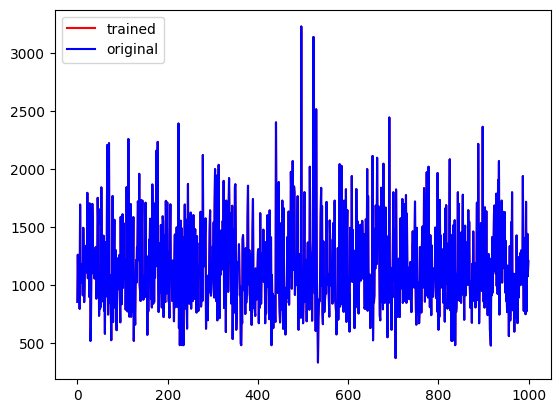

In [70]:
anf.trainHybridJangOffLine(epochs=10, k=0.005)

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()


Funciones de pertenencia después de entrenar


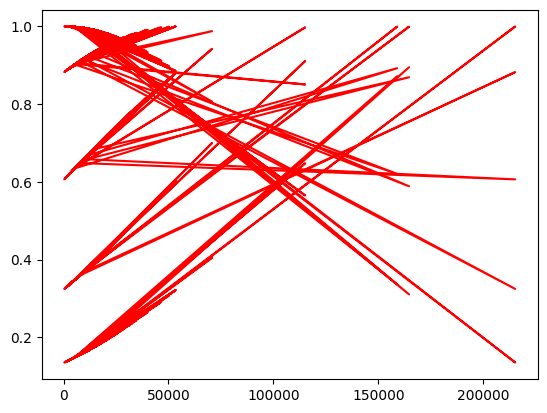

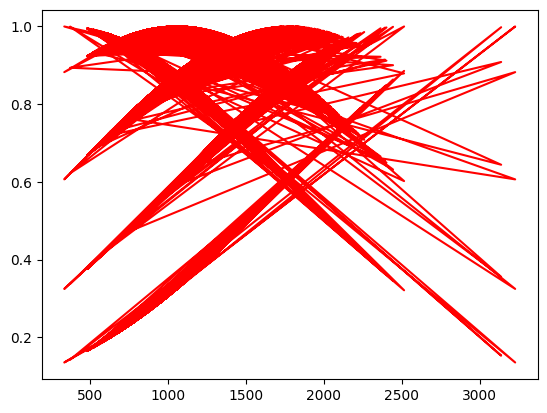

[[['gaussmf', {'mean': 333.9999939337386, 'sigma': 107455.49999989316}], ['gaussmf', {'mean': 54061.800065047864, 'sigma': 107455.49996856062}], ['gaussmf', {'mean': 107789.49990524269, 'sigma': 107455.50009254707}], ['gaussmf', {'mean': 161517.19989089624, 'sigma': 107455.50016146086}], ['gaussmf', {'mean': 215244.99996345636, 'sigma': 107455.50007239726}]], [['gaussmf', {'mean': 333.99988845108766, 'sigma': 1446.9900652371193}], ['gaussmf', {'mean': 1057.527106156335, 'sigma': 1447.0198132136602}], ['gaussmf', {'mean': 1780.993561881456, 'sigma': 1447.0004515883868}], ['gaussmf', {'mean': 2504.497498917591, 'sigma': 1446.996944226917}], ['gaussmf', {'mean': 3227.978628424526, 'sigma': 1447.0109284669995}]]]


In [71]:
print("Funciones de pertenencia después de entrenar")

anf.plotMF(X, 0)
anf.plotMF(Y, 1)
print(anf.memFuncs)


## Resultados

Podemos observar que el error cuadrático medio del modelo generado es mínimo, aproximadamente <b>2.05-e5</b> en la <b>época número 6</b>. Igualmente, podemos observar en la gráfica resultante que el valor predicho y el valor real es prácticamente igual.

Esto significa que el modelo generado es apropiado y puede ser utilizado para predecir precios de vivienda con bastante fidelidad.